# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## my computer can't take me. DON'T UNDERESTIMATE THE POWER OF MY MACHINE
trump = pd.read_csv('../../../datasets/payments.csv')

### What is the distribution of the outcome? 

In [3]:
trump.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
trump.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
trump.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


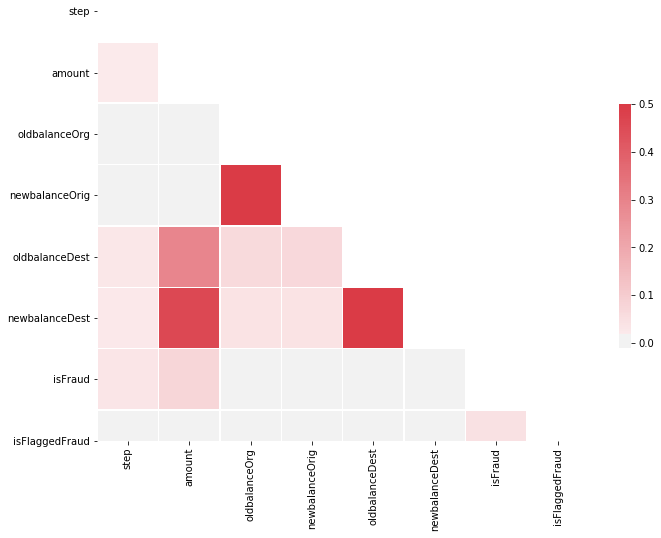

In [6]:
corr = trump.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## this is a bit weird, but I'll take it

In [7]:
# isFraud (target) has a bigger corr with amount and step

In [8]:
## wait, i forgot to account for inbalanced data

In [9]:
trump.isFraud.value_counts()
## ok. lemme sample the 0's

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
ones = trump.loc[trump.isFraud == 1]

In [11]:
zeroes = trump.loc[trump.isFraud == 0].sample(round(ones.shape[0]*1.2))

In [12]:
trump = pd.concat([ones, zeroes], axis = 0)

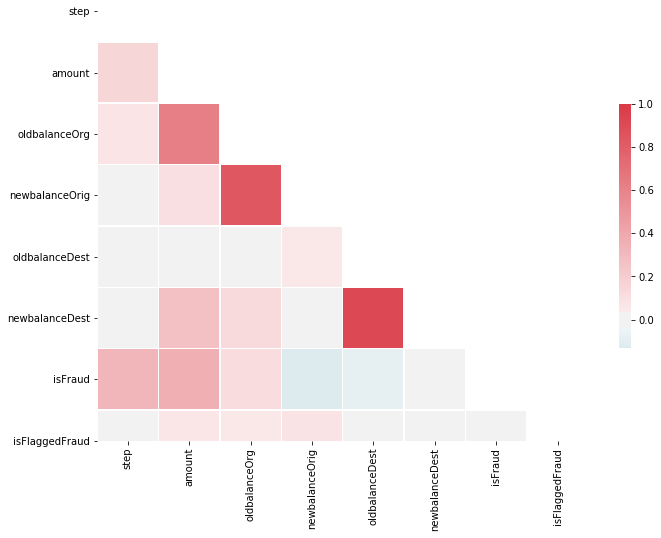

In [13]:
corr = trump.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## i like it. will select some vars with higher corr with target and less between themselves

In [14]:
## shite. i forgot the obj columns

In [15]:
len(trump.nameOrig.unique())
### hasta la vista

18069

In [16]:
len(trump.nameDest.unique())
### hasta la vista

17877

In [17]:
len(trump.type.unique())
trump.type.value_counts() ## nice

CASH_OUT    7597
TRANSFER    4904
PAYMENT     3294
CASH_IN     2214
DEBIT         60
Name: type, dtype: int64

In [18]:
trump = pd.concat([trump, pd.get_dummies(trump.type)], axis = 1)

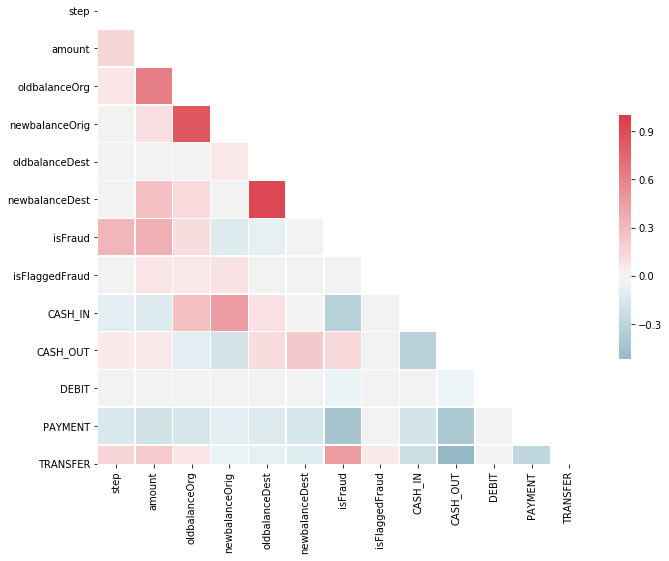

In [19]:
corr = trump.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## WOW! new vars for our model

In [20]:
## binary y, it's binomial or bernouli, the overwhelming majority of the outcomes were 0, but that is dealt with

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [21]:
# Your code here
trump.step.value_counts()
## it's not optimal since it's not a timestamp but I don't really see a reason to change it

163    102
18      98
43      93
187     93
36      91
      ... 
76       4
435      4
432      4
662      2
112      2
Name: step, Length: 743, dtype: int64

In [22]:
trump.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT',
       'TRANSFER'],
      dtype='object')

In [35]:
trump = trump.loc[:, ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
              'oldbalanceDest', 'newbalanceDest', 'CASH_IN', 
              'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'isFraud']]

In [38]:
trump

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1,1
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0,1
251,1,2806.00,2806.00,0.00,0.00,0.00,0,0,0,0,1,1
252,1,2806.00,2806.00,0.00,26202.00,0.00,0,1,0,0,0,1
680,1,20128.00,20128.00,0.00,0.00,0.00,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2054546,181,1816.76,21349.00,19532.24,6921067.09,6922883.84,0,0,1,0,0,0
199056,13,27014.35,0.00,0.00,0.00,0.00,0,0,0,1,0,0
6142445,545,201880.29,4090310.07,4292190.35,373942.72,172062.43,1,0,0,0,0,0
241662,14,9620.03,179.00,0.00,0.00,0.00,0,0,0,1,0,0


In [40]:
X = trump.drop(['isFraud'], axis = 1)
y = trump.isFraud

### Run a logisitc regression classifier and evaluate its accuracy.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [47]:
model = LogisticRegression().fit(X_train, y_train)
model.score(X_test, y_test)

/home/sin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9039845047039292

### Now pick a model of your choice and evaluate its accuracy.

In [50]:
# Your code here
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
knn.score(X_test, y_test)

0.9576646375207526

### Which model worked better and how do you know?

In [56]:
from sklearn.model_selection import cross_val_score

results = cross_val_score(model, X, y, cv=5)
np.mean(results)

/home/sin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/sin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

0.9031453753492759

In [57]:
results = cross_val_score(knn, X, y, cv=5)
np.mean(results)

0.9540657214255764

In [58]:
# Your response here
## knn > log i think

## shouldn't i be importing all the models and running them all like a monkey?

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.